In [2]:
# ==========================================
#   Diet Patterns vs Cardiovascular Mortality
# ==========================================

from pathlib import Path
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ------------------------------------------------
# 1. Auto-detect project root
# ------------------------------------------------
def find_project_root(marker="README.md"):
    cur = Path().resolve()
    while cur != cur.parent:
        if (cur / marker).exists():
            return cur
        cur = cur.parent
    raise RuntimeError("Project root not found.")

ROOT = find_project_root()
DB_PATH = ROOT / "data" / "db" / "global_health_nutrition.db"

print("PROJECT ROOT:", ROOT)
print("DATABASE PATH:", DB_PATH)
print("DB Exists:", DB_PATH.exists())

PROJECT ROOT: F:\data-analysis_startup\global_health_nutrition_analysis
DATABASE PATH: F:\data-analysis_startup\global_health_nutrition_analysis\data\db\global_health_nutrition.db
DB Exists: True


In [3]:
# ------------------------------------------------
# 2. Load diet + health data using SQL
# ------------------------------------------------
query = """
SELECT
    h.country,
    h.year,
    h.life_expectancy,
    h.infant_mortality_rate,
    h.under5_mortality_rate,
    h.uhc_coverage,
    d.animal_kcal,
    d.plant_kcal,
    d.fat_kcal,
    d.carb_kcal,
    d.total_fruit_consumption,
    g.pct_death_cardiovascular
FROM v_health_access h
LEFT JOIN v_diet_profiles d
    ON h.country = d.country AND h.year = d.year
LEFT JOIN v_core_clean g
    ON h.country = g.country AND h.year = g.year AND g.gender = 'Both sexes'
"""

conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query(query, conn)
conn.close()

print("Rows loaded:", len(df))
display(df.head())

Rows loaded: 8430


,country,year,life_expectancy,infant_mortality_rate,under5_mortality_rate,uhc_coverage,animal_kcal,plant_kcal,fat_kcal,carb_kcal,total_fruit_consumption,pct_death_cardiovascular
0,Afghanistan,1990.0,50.351333,120.266667,177.600000,NaN,67.80,197.08,435.60,1613.52,15.41,NaN
1,Afghanistan,1991.0,51.018667,116.666667,171.600000,NaN,64.96,173.68,370.08,1435.28,19.61,NaN
2,Afghanistan,1992.0,51.661667,113.166667,165.833333,NaN,59.76,159.12,342.99,1329.13,15.37,NaN
3,Afghanistan,1993.0,52.277667,109.833333,160.366667,NaN,58.44,168.88,297.72,1384.96,14.36,NaN
4,Afghanistan,1994.0,52.866667,106.633333,155.166667,NaN,60.04,159.32,286.92,1313.72,13.21,NaN


In [4]:
# ------------------------------------------------
# 3. Basic dataset overview
# ------------------------------------------------
print("Columns:", df.columns.tolist())
print("Years:", df["year"].min(), "→", df["year"].max())
print("Countries:", df["country"].nunique())

display(df.describe().T.head(20))

Columns: ['country', 'year', 'life_expectancy', 'infant_mortality_rate', 'under5_mortality_rate', 'uhc_coverage', 'animal_kcal', 'plant_kcal', 'fat_kcal', 'carb_kcal', 'total_fruit_consumption', 'pct_death_cardiovascular']
Years: 1990.0 → 2019.0
Countries: 281


,count,mean,std,min,25%,50%,75%,max
year,8430.0,2004.500000,8.655955,1990.000000,1997.000000,2004.500000,2012.000000,2019.000000
life_expectancy,8430.0,69.475654,9.305378,26.192333,64.301333,71.728654,76.347500,86.751000
infant_mortality_rate,5019.0,33.078259,31.776973,1.490000,8.360000,21.013333,48.676667,176.300000
under5_mortality_rate,5019.0,47.398223,52.685795,1.680000,9.798333,24.776667,67.576667,328.566667
uhc_coverage,358.0,63.231844,15.763639,22.000000,49.000000,68.000000,76.000000,89.000000
animal_kcal,4074.0,135.321159,81.182599,12.760000,62.810000,121.000000,201.480000,405.160000
plant_kcal,4074.0,168.617261,37.635218,82.800000,143.280000,163.240000,189.680000,330.760000
fat_kcal,4074.0,715.938490,317.171814,137.790000,458.977500,661.230000,924.165000,1542.240000
carb_kcal,4074.0,1682.764229,232.561373,892.180000,1527.887500,1683.695000,1825.685000,2564.870000
total_fruit_consumption,8430.0,19.113756,30.026075,0.000000,0.000000,5.780000,31.075000,368.960000


In [5]:
# ------------------------------------------------
# 4. Latest year slice
# ------------------------------------------------
latest_year = df["year"].max()
df_latest = df[df["year"] == latest_year].copy()

print(f"\nLatest year dataset: {latest_year}, rows: {len(df_latest)}")
display(df_latest.head())


Latest year dataset: 2019.0, rows: 281


,country,year,life_expectancy,infant_mortality_rate,under5_mortality_rate,uhc_coverage,animal_kcal,plant_kcal,fat_kcal,carb_kcal,total_fruit_consumption,pct_death_cardiovascular
29,Afghanistan,2019.0,64.867667,46.453333,60.223333,NaN,NaN,NaN,NaN,NaN,0.0,35.3
59,Africa,2019.0,63.177000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
89,Albania,2019.0,78.592000,8.596667,9.666667,NaN,NaN,NaN,NaN,NaN,0.0,11.4
119,Algeria,2019.0,76.896333,19.930000,23.230000,NaN,NaN,NaN,NaN,NaN,0.0,13.9
149,American Samoa,2019.0,73.745000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


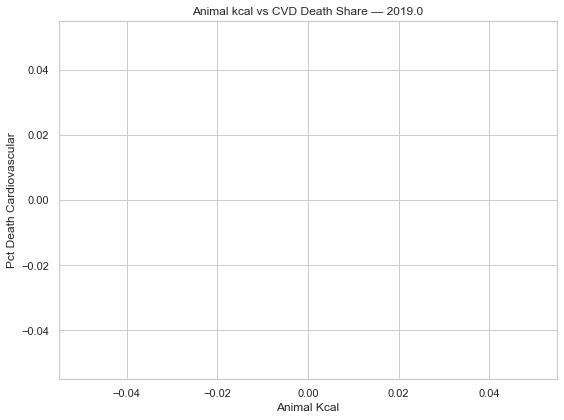

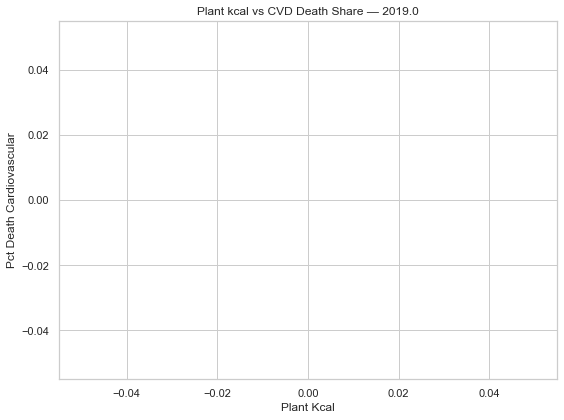

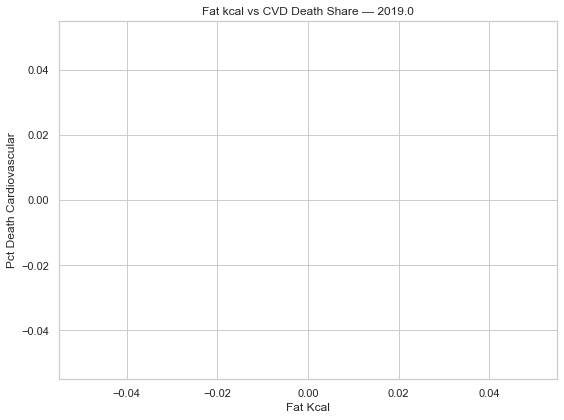

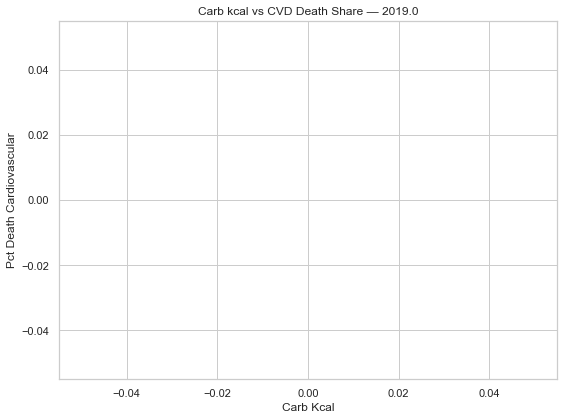

In [6]:
# ------------------------------------------------
# 5. Scatterplots — Diet vs CVD Mortality
# ------------------------------------------------
def safe_scatter(x, y, title):
    if {x, y}.issubset(df_latest.columns):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_latest, x=x, y=y)
        plt.xlabel(x.replace("_", " ").title())
        plt.ylabel(y.replace("_", " ").title())
        plt.title(f"{title} — {latest_year}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping: {x} vs {y} (missing column)")

safe_scatter("animal_kcal", "pct_death_cardiovascular", "Animal kcal vs CVD Death Share")
safe_scatter("plant_kcal", "pct_death_cardiovascular", "Plant kcal vs CVD Death Share")
safe_scatter("fat_kcal", "pct_death_cardiovascular", "Fat kcal vs CVD Death Share")
safe_scatter("carb_kcal", "pct_death_cardiovascular", "Carb kcal vs CVD Death Share")

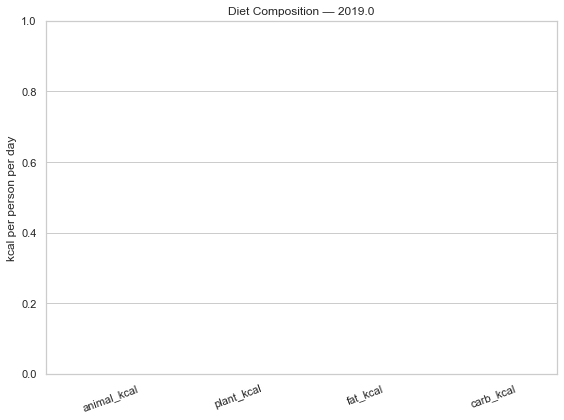

In [7]:
# ------------------------------------------------
# 6. Diet composition distribution
# ------------------------------------------------
diet_cols = ["animal_kcal", "plant_kcal", "fat_kcal", "carb_kcal"]
diet_cols = [c for c in diet_cols if c in df_latest.columns]

if diet_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_latest[diet_cols])
    plt.title(f"Diet Composition — {latest_year}")
    plt.ylabel("kcal per person per day")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()
else:
    print("No diet columns available for boxplot.")

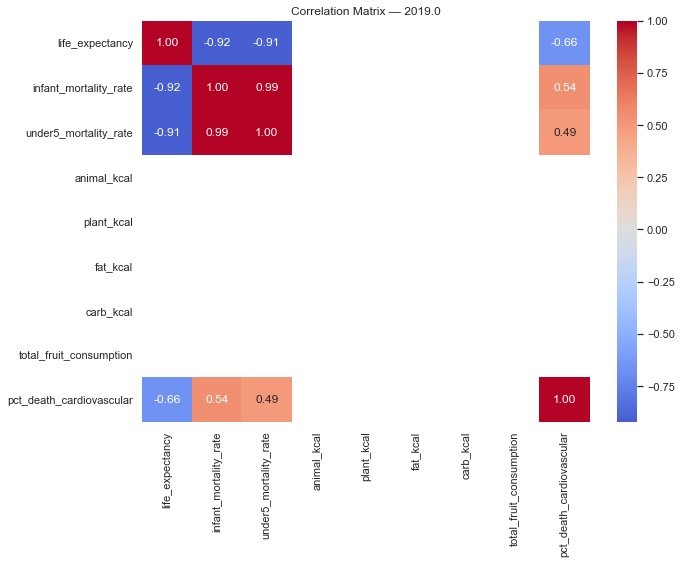

In [8]:
# ------------------------------------------------
# 7. Correlation matrix
# ------------------------------------------------
corr_cols = [
    "life_expectancy",
    "infant_mortality_rate",
    "under5_mortality_rate",
    "animal_kcal",
    "plant_kcal",
    "fat_kcal",
    "carb_kcal",
    "total_fruit_consumption",
    "pct_death_cardiovascular",
]

corr_cols = [c for c in corr_cols if c in df_latest.columns]
corr = df_latest[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title(f"Correlation Matrix — {latest_year}")
plt.tight_layout()
plt.show()

Mixed    281
Name: diet_profile, dtype: int64

,diet_profile,life_expectancy,pct_death_cardiovascular,n
0,Mixed,73.613013,19.858889,281


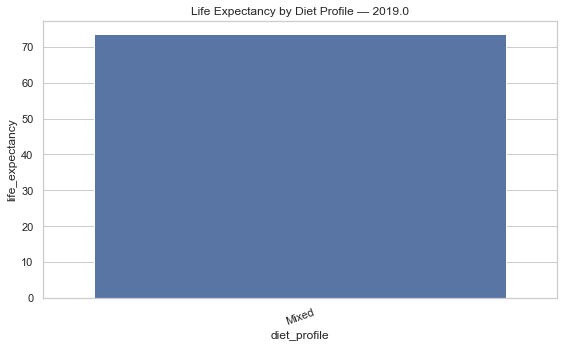

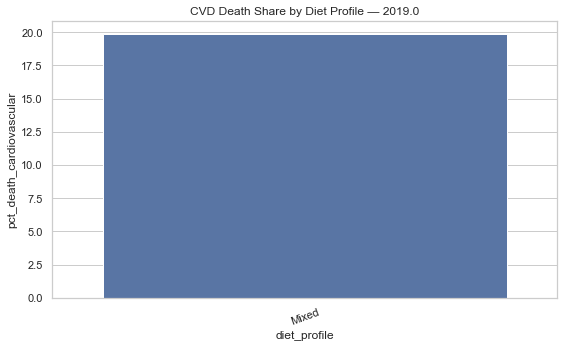

In [9]:
# ------------------------------------------------
# 8. Create a simple diet profile feature
# ------------------------------------------------
def diet_profile(row):
    if row.get("animal_kcal", 0) > row.get("plant_kcal", 0) and row.get("fat_kcal", 0) > row.get("carb_kcal", 0):
        return "Animal & Fat Heavy"
    if row.get("animal_kcal", 0) > row.get("plant_kcal", 0):
        return "Animal Protein Heavy"
    if row.get("plant_kcal", 0) > row.get("animal_kcal", 0):
        return "Plant Protein Heavy"
    return "Mixed"

df_latest["diet_profile"] = df_latest.apply(diet_profile, axis=1)
display(df_latest["diet_profile"].value_counts())

# Summary stats by diet profile
profile_stats = (
    df_latest.groupby("diet_profile")
    .agg(
        life_expectancy=("life_expectancy", "mean"),
        pct_death_cardiovascular=("pct_death_cardiovascular", "mean"),
        n=("country", "count")
    )
    .reset_index()
)

display(profile_stats)

plt.figure(figsize=(8, 5))
sns.barplot(data=profile_stats, x="diet_profile", y="life_expectancy")
plt.title(f"Life Expectancy by Diet Profile — {latest_year}")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=profile_stats, x="diet_profile", y="pct_death_cardiovascular")
plt.title(f"CVD Death Share by Diet Profile — {latest_year}")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Diet trends for: Germany


,country,year,life_expectancy,infant_mortality_rate,under5_mortality_rate,uhc_coverage,animal_kcal,plant_kcal,fat_kcal,carb_kcal,total_fruit_consumption,pct_death_cardiovascular
2790,Germany,1990.0,75.367333,6.966667,8.510000,NaN,240.52,146.12,1264.86,1609.50,76.37,NaN
2791,Germany,1991.0,75.578333,6.563333,8.026667,NaN,234.24,144.20,1269.00,1675.56,61.24,NaN
2792,Germany,1992.0,75.797333,6.186667,7.573333,NaN,229.48,144.80,1314.90,1702.82,67.81,NaN
2793,Germany,1993.0,76.027667,5.836667,7.153333,NaN,216.28,142.84,1240.47,1602.41,49.64,NaN
2794,Germany,1994.0,76.272667,5.530000,6.776667,NaN,222.28,145.48,1240.74,1604.50,52.62,NaN


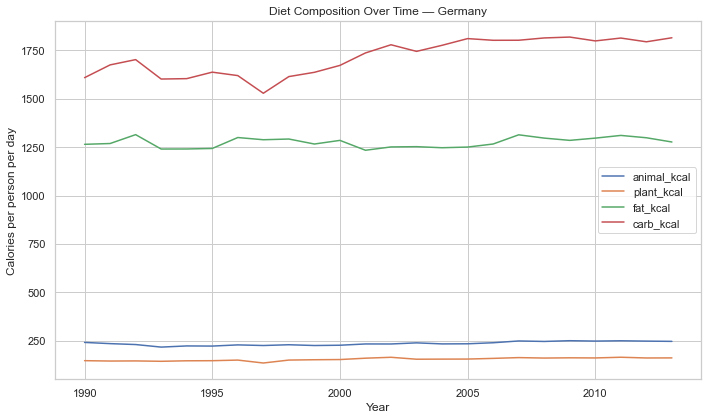

In [10]:
# ------------------------------------------------
# 9. Country Trend Example
# ------------------------------------------------
example_country = "Germany"  # choose any

if example_country in df["country"].unique():
    df_country = df[df["country"] == example_country].sort_values("year")

    print(f"\nDiet trends for: {example_country}")
    display(df_country.head())

    diet_cols_ts = [c for c in ["animal_kcal", "plant_kcal", "fat_kcal", "carb_kcal"] if c in df_country.columns]

    if diet_cols_ts:
        plt.figure(figsize=(10, 6))
        for col in diet_cols_ts:
            plt.plot(df_country["year"], df_country[col], label=col)
        plt.xlabel("Year")
        plt.ylabel("Calories per person per day")
        plt.title(f"Diet Composition Over Time — {example_country}")
        plt.legend()
        plt.tight_layout()
        plt.show()
else:
    print(f"Country '{example_country}' not found in dataset.")